In [ ]:
# use this code to connect to google drive  fromm 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# install import library  
!pip install tensorflow.io
!pip install os 
!pip install tensorflow 
!pip install matplotlib 
!pip install numpy
!pip install json 
!pip install pandas 
!pip install sklearn 
!pip install seaborn 
!pip install random 
!pip install keras
!pip install zipfile


In [ ]:
# import libraries
from zipfile import ZipFile
import os 
import pandas as pd 
import json
import cv2
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
from  sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import models, layers
import keras
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import scipy.io


#preprocessing & load data 

In [ ]:
path_file =r"/content/drive/MyDrive/facial recognition & mask detection /Medical mask.zip"

In [ ]:
with ZipFile(path_file,'r') as Zip: 
  Zip.printdir()
  Zip.extractall()

In [ ]:
annotation = r"/content/Medical mask/Medical Mask/annotations"
images1 = r"/content/Medical mask/Medical Mask/images" 
df = pd.read_csv(r"/content/drive/MyDrive/facial recognition & mask detection /train.csv")
#test =pd.read_csv("/content/drive/MyDrive/submission.csv")

In [ ]:
incorrect_mask=r"/content/drive/MyDrive/facial recognition & mask detection /mask &no mask/incorrect mask"
no_mask= r"/content/drive/MyDrive/facial recognition & mask detection /mask &no mask/no mask"

In [ ]:
labels={'mask': 0,'No mask': 1,'incorrect mask':2}


In [ ]:
IMAGE_SIZE =100


In [ ]:
data1=[]
for i in os.listdir(incorrect_mask) :
    img = cv2.imread(incorrect_mask+"/"+i)
    try:
        img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))    
        data1.append([img,labels["incorrect mask"]])
    except:
        print(f"can't resize this img the shape is {img.shape}")
   


In [ ]:
len(data1)

2674

In [ ]:
for i in os.listdir(no_mask) :
    img = cv2.imread(no_mask+"/"+i)
    try:
        img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))    
        data1.append([img,labels["No mask"]])
    except:
        print(f"can't resize this img the shape is {img.shape}")

In [ ]:
len(data1)

4774

##Mafa  data 

In [ ]:
path_file1 =r"/content/drive/MyDrive/facial recognition & mask detection /mafa/MAFA-Label-Test.zip"
path_file2 =r"/content/drive/MyDrive/facial recognition & mask detection /mafa/MAFA-Label-Train.zip"
path_file3 =r"/content/drive/MyDrive/facial recognition & mask detection /mafa/test-images.zip"
path_file4 =r"/content/drive/MyDrive/facial recognition & mask detection /mafa/train-images.zip"


In [ ]:
with ZipFile(path_file2,'r') as Zip: 
  Zip.printdir()
  Zip.extractall()

File Name                                             Modified             Size
LabelTrainAll.mat                              2017-10-02 03:29:08       959488
readme-train.txt                               2017-11-07 09:53:12         1090


In [ ]:
with ZipFile(path_file4,'r') as Zip: 
  Zip.printdir()
  Zip.extractall()

In [ ]:
images=r'/content/images'
label_train= scipy.io.loadmat('/content/LabelTrainAll.mat')

In [ ]:
len_data =len(label_train['label_train'][0])


In [ ]:
label_train['label_train'][0][5][2][0][0
]

79

In [ ]:
len(data1)

4774

In [ ]:
sum=0
n_del=0
error_data=[]
labels={'mask': 0,'No mask': 1,'incorrect mask':2}
for index in range(len_data):
  mask_type=label_train['label_train'][0][index][2][0][12:14]
  if mask_type[0] == 2 :   # if  the type is hande 
    n_del+=1
    continue
  elif  mask_type[0] == 3 :
    mask_label= "No mask"
  elif  mask_type[0] == 1 :
    if mask_type[1] == 3 :
       mask_label= "mask"
    else :
      mask_label= "incorrect mask"
  image_name = label_train['label_train'][0][index][1][0]
  image =cv2.imread(os.path.join(images,image_name),1)
  x,y,w,h =label_train['label_train'][0][index][2][0][0:4]
  box = x,y,x+w,y+h
  img=image[y:y+h,x:x+w]
  try :
    img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
    data1.append([img,labels[mask_label]])
    sum+=1
  except:
    print(f"{index} error in image ")
    print(f" the shape is {img.shape}")
    error_data.append(image_name)
print("end load data ")
 

In [ ]:
len(data1)

19467

##data(Medical mask )

In [ ]:
df.head()

,name,x1,x2,y1,y2,classname
0,2756.png,69,126,294,392,face_with_mask
1,2756.png,505,10,723,283,face_with_mask
2,2756.png,75,252,264,390,mask_colorful
3,2756.png,521,136,711,277,mask_colorful
4,6098.jpg,360,85,728,653,face_no_mask


In [ ]:
len(df)

15412

In [ ]:
df.query('name =="1801.jpg"')

,name,x1,x2,y1,y2,classname
13381,1801.jpg,451,186,895,697,face_no_mask


In [ ]:
df.classname.value_counts()

face_with_mask              4180
mask_surgical               2430
mask_colorful               1876
face_no_mask                1569
face_other_covering         1372
eyeglasses                   914
hat                          823
sunglasses                   358
hair_net                     287
scarf_bandana                260
goggles                      192
helmet                       187
hijab_niqab                  173
face_shield                  160
hood                         159
face_with_mask_incorrect     150
balaclava_ski_mask           134
turban                        94
gas_mask                      55
other                         39
Name: classname, dtype: int64

In [ ]:
df.name.nunique()

4326

In [ ]:
jsonfiles= []
for anno in os.listdir(annotation):
    with open(os.path.join(annotation,anno),'r') as info:
          jsonfiles.append(json.load(info))
jsonfiles[-1]

{'Annotations': [{'Attributes': {},
   'BoundingBox': [127, 73, 252, 211],
   'Confidence': 1,
   'ID': 288418427357165376,
   'classname': 'face_no_mask',
   'isProtected': False},
  {'Attributes': {},
   'BoundingBox': [699, 115, 776, 218],
   'Confidence': 1,
   'ID': 141625300137074080,
   'classname': 'face_no_mask',
   'isProtected': False},
  {'Attributes': {},
   'BoundingBox': [782, 101, 888, 236],
   'Confidence': 1,
   'ID': 438720379220151616,
   'classname': 'face_no_mask',
   'isProtected': False}],
 'FileName': '5818.jpg',
 'NumOfAnno': 3}

In [ ]:
def getJSON(filePathandName):
    with open(filePathandName,'r') as f:
        return json.load(f)

In [ ]:
mask = ['face_with_mask']
non_mask = ["face_no_mask"]
incorrect =['face_with_mask_incorrect']
labels={'mask': 0,'No mask': 1,'incorrect mask':2}
for i in df["name"].unique():
    f = i+".json"
    for j in getJSON(os.path.join(annotation,f)).get("Annotations"):
        if j["classname"] in mask:
            x,y,w,h = j["BoundingBox"]
            img = cv2.imread(os.path.join(images1,i),1)
            img = img[y:h,x:w]
            img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))
            
             

            data1.append([img,labels["mask"]])
        if j["classname"] in non_mask:
            x,y,w,h = j["BoundingBox"]
            img = cv2.imread(os.path.join(images1,i),1)
            img = img[y:h,x:w]
            img = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE))    
            data1.append([img,labels["No mask"]])

random.shuffle(data1) 

In [ ]:
len(data1)

25216

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


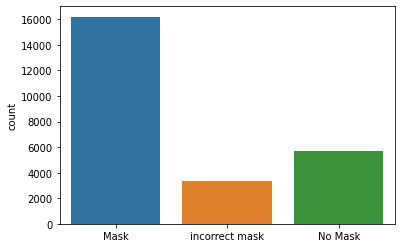

In [ ]:
count_face = []
for pic in data1:
    if(pic[1] == 0):
        count_face.append("Mask")

    elif (pic[1]==2):
      count_face.append("incorrect mask")
    else:
        count_face.append("No Mask")
sns.countplot(count_face)

In [ ]:
X = []
Y = []
for features,label in data1:
    X.append(features)
    Y.append(label)

In [ ]:

X = np.array(X)/255.0


In [ ]:
X = X.reshape(-1,IMAGE_SIZE,IMAGE_SIZE,3)


In [ ]:
df1=pd.DataFrame(data1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = df1[1]
y = y.to_numpy().transpose() 
df = df1.drop([1], axis=1)
x = df1.to_numpy()  


In [ ]:
X.shape

(25216, 100, 100, 3)

#split data

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(X, y,test_size=0.2,random_state=42)



In [ ]:
unique_train, counts_train= np.unique(y_train, return_counts=True)
print (np.asarray((unique_train, counts_train)))

[[    0     1     2]
 [12983  4542  2647]]


In [ ]:
unique_val, counts_val= np.unique(y_val, return_counts=True)
print (np.asarray((unique_val, counts_val)))

[[   0    1    2]
 [3223 1132  689]]


In [ ]:
from keras.utils import np_utils

n_classes=3
Y_train = np_utils.to_categorical(y_train, n_classes)


In [ ]:
Y_train.shape

(20172, 3)

# build model 

In [ ]:
data_augmentaion = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,    
        rotation_range=15,    
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=False)
data_augmentaion.fit(x_train)

In [ ]:
CHANNELS = 3
BATCH_SIZE =128
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model = Sequential()

model.add(Conv2D(128, (3, 3), padding = "valid", activation='relu', input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [ ]:
model.compile(    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam' ,metrics=['accuracy'])


In [ ]:

history = model.fit(data_augmentaion.flow(x_train, y_train, batch_size=BATCH_SIZE),
                    epochs=100,
                    verbose=1,
                    validation_data=(x_val, y_val))
                    


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


158/158 [==============================] - 60s 286ms/step - loss: 0.4611 - accuracy: 0.8198 - val_loss: 0.3035 - val_accuracy: 0.8955
Epoch 2/100
158/158 [==============================] - 43s 273ms/step - loss: 0.2882 - accuracy: 0.9001 - val_loss: 0.2185 - val_accuracy: 0.9284
Epoch 3/100
158/158 [==============================] - 43s 271ms/step - loss: 0.2522 - accuracy: 0.9129 - val_loss: 0.1933 - val_accuracy: 0.9350
Epoch 4/100
158/158 [==============================] - 42s 268ms/step - loss: 0.2348 - accuracy: 0.9209 - val_loss: 0.1917 - val_accuracy: 0.9302
Epoch 5/100
158/158 [==============================] - 43s 271ms/step - loss: 0.2168 - accuracy: 0.9267 - val_loss: 0.1928 - val_accuracy: 0.9308
Epoch 6/100
158/158 [==============================] - 43s 272ms/step - loss: 0.2026 - accuracy: 0.9317 - val_loss: 0.1671 - val_accuracy: 0.9435
Epoch 7/100
158/158 [==============================] - 45s 285ms/step - loss: 0.1914 - accuracy: 0.9356 - val_loss: 0.1534 - val_accurac

In [ ]:
model.save("face_mask.h5")

In [ ]:

scores = model.evaluate(x_val,y_val)


158/158 [==============================] - 2s 12ms/step - loss: 0.1228 - accuracy: 0.9667


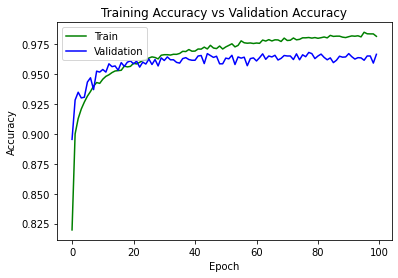

In [ ]:
plt.plot(history.history['accuracy'],'g')
plt.plot(history.history['val_accuracy'],'b')
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

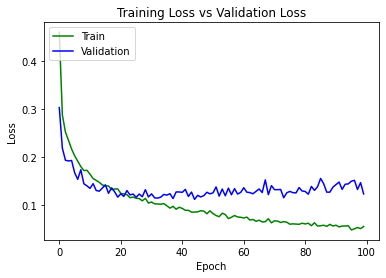

In [ ]:
plt.plot(history.history['loss'],'g')
plt.plot(history.history['val_loss'],'b')
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#test

In [ ]:
! pip install retina-face
from retinaface import RetinaFace


In [ ]:
test_images = ['1059.jpg', '1504.jpg', '0072.jpg', '0015.jpg','0353.jpg','1374.jpg','0001.jpg','0002.png']

In [ ]:
os.path.join(images1, test_images[0])
image = cv2.imread(os.path.join(images1, test_images[0]), 1)
retina_face = RetinaFace.detect_faces(os.path.join(images1, test_images[0]))

<function matplotlib.pyplot.show>

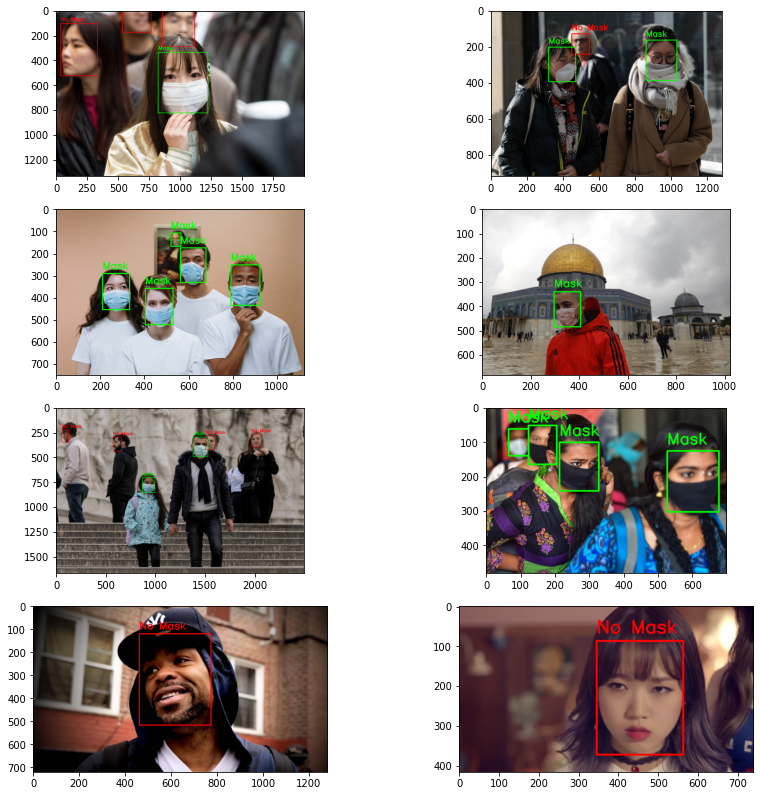

In [ ]:
fig  = plt.figure(figsize=(14,14))
rows = 4
cols = 2
axes = []
assign = {'0' : 'Mask', '1': 'No Mask',"incorrect mask":2}
for j, im in enumerate(test_images):

    image = cv2.imread(os.path.join(images1, im), 1)
    retina_face = RetinaFace.detect_faces(os.path.join(images1, im))
    
    for key in retina_face.keys():
        box = retina_face[key]
        box = box['facial_area']
        (x,y,w,h) = box
        img = image[y:h,x:w]

        if len(img.shape) == 3 :
          img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
          img = np.array(img) / 255.0
          img = img.reshape( 1,IMAGE_SIZE, IMAGE_SIZE,3 )
          result = model.predict(img)
          
          if (result[0][0]<result[0][1])&(result[0][2]<result[0][1]) :
              label_Y = 1
              cv2.rectangle(image, (box[2],box[3]), (box[0],box[1]),( 0 ,0, 255), 3)
              cv2.putText(image, assign[str(label_Y)], (box[0],box[1] - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,0, 255),3)

          elif (result[0][0]<result[0][2])&(result[0][1]<result[0][2]) :
              label_Y = 2
              cv2.rectangle(image, (box[2],box[3]), (box[0],box[1]),( 0 ,255 ,255), 3)
              cv2.putText(image, assign[str(label_Y)], (box[0],box[1] - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255, 255),3)

          elif (result[0][1]<result[0][0])&(result[0][2]<result[0][0]):

              label_Y = 0
              cv2.rectangle(image , (box[2],box[3]) , (box[0] , box[1]) , (0 , 255, 0), 3)
              cv2.putText(image, assign[str(label_Y)], (box[0],box[1] - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255, 0),3)
    axes.append(fig.add_subplot(rows, cols, j+1))
    image = np.array(image, dtype=np.uint8)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.grid(False)
plt.show

In [ ]:
test_images1 = ['0180.jpg', '1604.jpg', '0770.jpg', '0652.jpg','1200.jpg','1377.jpg','0005.jpg','0009.jpg']

<function matplotlib.pyplot.show>

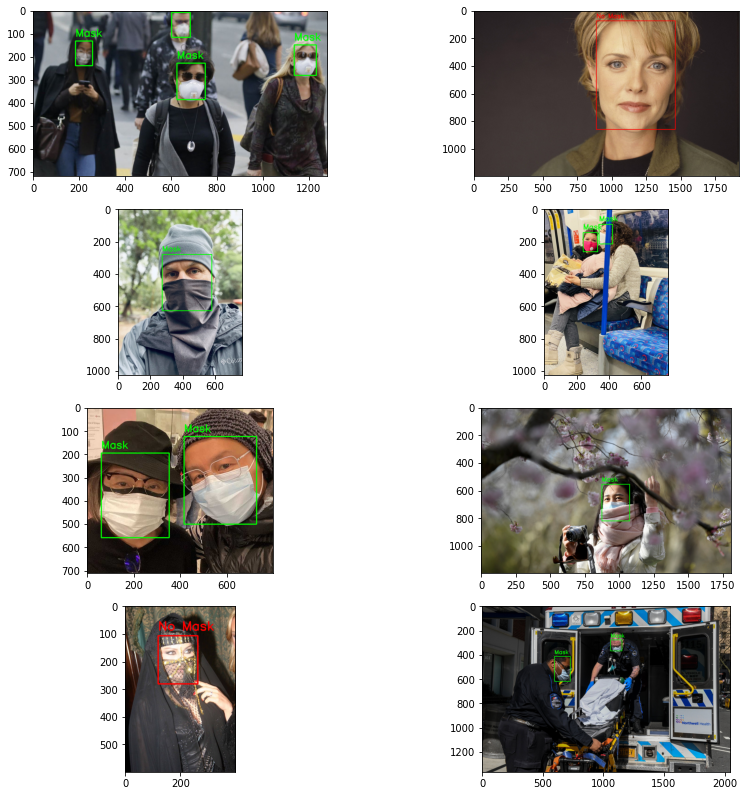

In [ ]:
fig  = plt.figure(figsize=(14,14))
rows = 4
cols = 2
axes = []
assign = {'0' : 'Mask', '1': 'No Mask',"incorrect mask":"2"}
for j, im in enumerate(test_images1):

    image = cv2.imread(os.path.join(images1, im), 1)
    retina_face = RetinaFace.detect_faces(os.path.join(images1, im))
    
    for key in retina_face.keys():
        box = retina_face[key]
        box = box['facial_area']
        (x,y,w,h) = box
        img = image[y:h,x:w]

        if len(img.shape) == 3 :
          img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
          img = np.array(img) / 255.0
          img = img.reshape( 1,IMAGE_SIZE, IMAGE_SIZE,3 )
          result = model.predict(img)
          
          if (result[0][0]<result[0][1])&(result[0][2]<result[0][1]) :
              label_Y = 1
              cv2.rectangle(image, (box[2],box[3]), (box[0],box[1]),( 0 ,0, 255), 3)
              cv2.putText(image, assign[str(label_Y)], (box[0],box[1] - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,0, 255),3)

          elif (result[0][0]<result[0][2])&(result[0][1]<result[0][2]) :
              label_Y = 2
              cv2.rectangle(image, (box[2],box[3]), (box[0],box[1]),( 0 ,255 ,255), 3)
              cv2.putText(image, assign[str(label_Y)], (box[0],box[1] - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255, 255),3)

          elif (result[0][1]<result[0][0])&(result[0][2]<result[0][0]):

              label_Y = 0
              cv2.rectangle(image , (box[2],box[3]) , (box[0] , box[1]) , (0 , 255, 0), 3)
              cv2.putText(image, assign[str(label_Y)], (box[0],box[1] - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255, 0),3)
    axes.append(fig.add_subplot(rows, cols, j+1))
    image = np.array(image, dtype=np.uint8)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.grid(False)
plt.show

In [ ]:
img_path=r'/content/images/train_00000006.jpg'

<function matplotlib.pyplot.show>

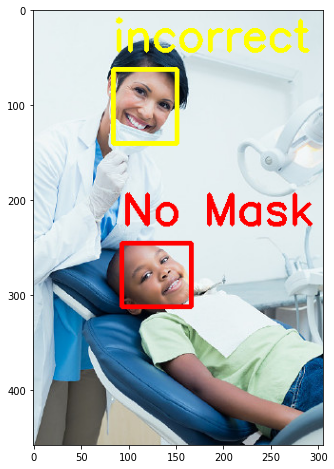

In [ ]:
assign = {'0' : 'Mask', '1': 'No Mask','2':'incorrect mask'}
plt.figure(figsize=(8,8))

image = cv2.imread(img_path, 1)
retina_face = RetinaFace.detect_faces(img_path)

for key in retina_face.keys():
    box = retina_face[key]
    box = box['facial_area']
    (x,y,w,h) = box
    img = image[y:h,x:w]

    if len(img.shape) == 3 :
      img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
      img = np.array(img) / 255.0
      img = img.reshape( 1,IMAGE_SIZE, IMAGE_SIZE,3 )
      result = model.predict(img)
      
      if (result[0][0]<result[0][1])&(result[0][2]<result[0][1]) :
          label_Y = 1
          cv2.rectangle(image, (box[2],box[3]), (box[0],box[1]),( 0 ,0, 255), 3)
          cv2.putText(image, assign[str(label_Y)], (box[0],box[1] - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,0, 255),3)

      elif (result[0][0]<result[0][2])&(result[0][1]<result[0][2]) :
          label_Y = 2
          cv2.rectangle(image, (box[2],box[3]), (box[0],box[1]),( 0 ,255 ,255), 3)
          cv2.putText(image, assign[str(label_Y)], (box[0],box[1] - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255, 255),3)

      elif (result[0][1]<result[0][0])&(result[0][2]<result[0][0]):

          label_Y = 0
          cv2.rectangle(image , (box[2],box[3]) , (box[0] , box[1]) , (0 , 255, 0), 3)
          cv2.putText(image, assign[str(label_Y)], (box[0],box[1] - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255, 0),3)
axes.append(fig.add_subplot(rows, cols, j+1))
image = np.array(image, dtype=np.uint8)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.grid(False)
plt.show